# Kernel SVM
> Parthiv Desai

> CPSC - 483 - 03 

#Importing the libraries

In [1]:
import numpy as np #Numpy is widely used library for handling number
import matplotlib.pyplot as plt  #Provides a library for data visualization for plotting graphs
import pandas as pd #Used for data manipulation

#Importing the dataset

In [2]:
dataset = pd.read_csv("/content/drive/MyDrive/Data_classification_copy.csv") #Pull the Social_Network_Ads.csv file from CSV into a variable.
x_values = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values #Indexing all the values till the last column.

#Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split #Importing train_test_split that is a method to split the specified dataset into training set and testing set.
X_train,X_test,y_train,y_test=train_test_split(x_values,y,test_size = 0.25, random_state = 0) #Four subsets are returned. x_values is the data matrix. y is the target variable. X_train and y_train are used for training the model. X_test and y_test are used to evaluate the performance of the given model.

In [ ]:
print(X_train)

[[1236043       3       3 ...       3       6       1]
 [ 691628       8       6 ...       3       5       1]
 [ 740492       1       1 ...       3       1       1]
 ...
 [ 476903      10       5 ...       3       3       8]
 [1201870       4       1 ...       2       1       1]
 [1168736      10      10 ...       8       8       8]]


In [ ]:
print(X_test)

[[ 653777       8       3 ...       3       3       1]
 [1187805       8       8 ...       7       8       7]
 [1223426       1       1 ...       3       1       1]
 ...
 [1354840       2       1 ...       3       1       1]
 [ 826923       1       1 ...       1       1       1]
 [1173514       1       1 ...       1       1       1]]


In [ ]:
print(y_train)

[0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1
 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 0]


In [ ]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


#Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler #Importing Standard scaler libraries
sc = StandardScaler() #Creating a standardScaler object that can be used for transforming the given data. StandardScalar is used for rescaling the features for implementing standard normal distribution. 
X_train=sc.fit_transform(X_train) #Implement the fit_transform method to the X_train to fit the scaler on the training data
X_test=sc.transform(X_test) #When implementing, it results in each feature with a mean of 0 and a standard deviation of 1, therefore resulting in better performnace
y = np.ravel(y)

In [ ]:
print(X_train)

[[ 0.22260314 -0.50797323 -0.0350473  ... -0.14549953  1.14117287
  -0.34609388]
 [-0.5798432   1.28307032  0.96502344 ... -0.14549953  0.7931194
  -0.34609388]
 [-0.50781958 -1.22439065 -0.70176114 ... -0.14549953 -0.59909448
  -0.34609388]
 ...
 [-0.89633942  1.99948773  0.63166653 ... -0.14549953  0.09701246
   4.37231932]
 [ 0.17223348 -0.14976452 -0.70176114 ... -0.57672642 -0.59909448
  -0.34609388]
 [ 0.12339526  1.99948773  2.29845111 ...  2.01063488  1.83727981
   4.37231932]]


In [ ]:
y = np.ravel(y)

#Training the Kernel SVM model on the Training set

In [ ]:
from sklearn.svm import SVC #Importing SVC class from svm classifier.
classifier = SVC(kernel = 'rbf', random_state = 0) #Use the Radial basis function kernel. 
classifier.fit(X_train,y_train) #Fit method helps in training the classifier on the given training data.

SVC(random_state=0)

#Predicting a new result

In [ ]:
y_pred = classifier.predict(X_test)

#Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test) #Predicting the X_test dataset which is a 2-D array containing independent variables. 
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) #The concatenation helps to concatenate the previously predicted values and actuaal values in the same column and in a single array.

[[2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 4]
 [4 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]


#Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score #Importing the confusing matrix and accuracy_score libraries
cm = confusion_matrix(y_test,y_pred) #The confusion matrix forms a table that summarizes the function and performance of the given algorithm of the test values. It successfully depicts true positive,negative and false positive, negative predictions.
print(cm) #Printing confusion matrix
accuracy_score(y_test, y_pred) #Accuracy_score function is used for computing the accuracy of the previous classifier by getting accurate predictions and results are only the true positive and true negative.

[[102   5]
 [  3  61]]


0.9532163742690059

#Visualising Training set results

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

NameError: ignored

#Visualising the Test set results

<ipython-input-15-0a189da0ce51>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


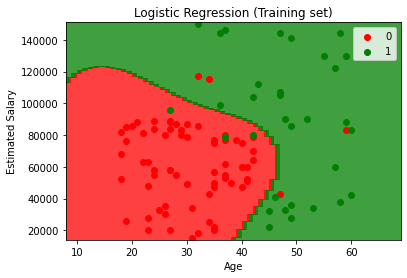

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()